In [1]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
demo = pd.read_csv("income_evaluation.csv")
df = copy.deepcopy(demo)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Checking nulls

In [ ]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [3]:
df.columns = [col.strip() for col in df.columns]

### Feature Engineering

In [ ]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [ ]:
for col in df.columns:
    print(col, ": ",df[col].unique(),"\n\n")

age :  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 


workclass :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


fnlwgt :  [ 77516  83311 215646 ...  34066  84661 257302] 


education :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


education-num :  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 


marital-status :  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 


occupation :  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-

#### Native-country

In [ ]:
df[df["native-country"]==" ?"]["native-country"].value_counts()

native-country
 ?    583
Name: count, dtype: int64

In [4]:
df["native-country"] = df["native-country"].replace(" ?", "Other")

#### Workclass

In [ ]:
df[df["workclass"]==" ?"]["workclass"].value_counts()

 ?    1836
Name: workclass, dtype: int64

In [5]:
df['workclass'] = df['workclass'].replace('?', pd.NA)

most_frequent = df.groupby(['income', 'hours-per-week', 'education', "education-num"])['workclass'].agg(lambda x: x.mode()[0]).reset_index()

df = df.merge(most_frequent, on=['income', 'hours-per-week', 'education', 'education-num'], how='left')

df['workclass'] = df['workclass_y'].fillna(df['workclass_x'])

df = df.drop(['workclass_x', 'workclass_y'], axis=1)

In [6]:
df[df["workclass"]==" ?"]["workclass"].value_counts()

 ?    287
Name: workclass, dtype: int64

In [7]:
df = df[df['workclass'] != ' ?']

#### Occupation

In [ ]:
df[df["occupation"]==" ?"]["occupation"].value_counts()

 ?    1677
Name: occupation, dtype: int64

In [8]:
df['occupation'] = df['occupation'].replace('?', pd.NA)

most_frequent = df.groupby(['income', 'workclass', 'education', 'education-num'])['occupation'].agg(lambda x: x.mode()[0]).reset_index()

df = df.merge(most_frequent, on=['income', 'workclass', 'education', 'education-num'], how='left')

df['occupation'] = df['occupation_y'].fillna(df['occupation_x'])

df = df.drop(['occupation_x', 'occupation_y'], axis=1)

In [ ]:
df[df["occupation"]==" ?"]["occupation"].value_counts()

Series([], Name: occupation, dtype: int64)

#### Education

In [ ]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [9]:
df['education'].replace(' Preschool', 'K-12',inplace=True)
df['education'].replace(' 1st-4th', 'K-12',inplace=True)
df['education'].replace(' 5th-6th', 'K-12',inplace=True)
df['education'].replace(' 7th-8th', 'K-12',inplace=True)
df['education'].replace(' 9th', 'K-12',inplace=True)
df['education'].replace(' 10th', 'K-12',inplace=True)
df['education'].replace(' 11th', 'K-12',inplace=True)
df['education'].replace(' 12th', 'K-12',inplace=True)
df['education'].replace(' HS-grad', 'HS-grad',inplace=True)
df['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
df['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace(' Bachelors', 'Bachelors',inplace=True)
df['education'].replace(' Masters', 'Masters',inplace=True)
df['education'].replace(' Prof-school', 'Masters',inplace=True)
df['education'].replace(' Doctorate', 'Doctorate',inplace=True)

In [ ]:
df['education'].unique()

array(['Bachelors', 'HS-grad', 'K-12', 'Masters', 'CommunityCollege',
       'Doctorate'], dtype=object)

#### Income

In [10]:
df['income'].replace(' <=50K', 0, inplace=True)
df['income'].replace(' >50K', 1, inplace=True)

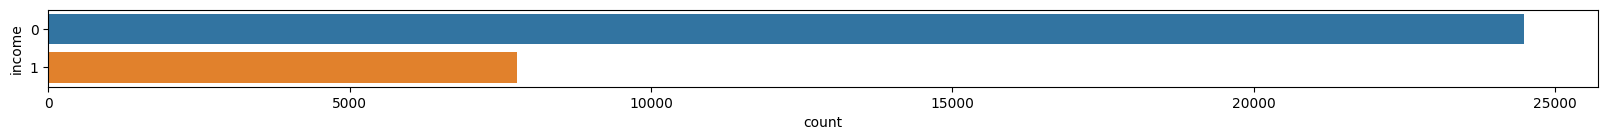

In [ ]:
figure = plt.figure(figsize=(20,1))
sns.countplot(data=df, y='income')
plt.show()

#### Visualizing data

[]

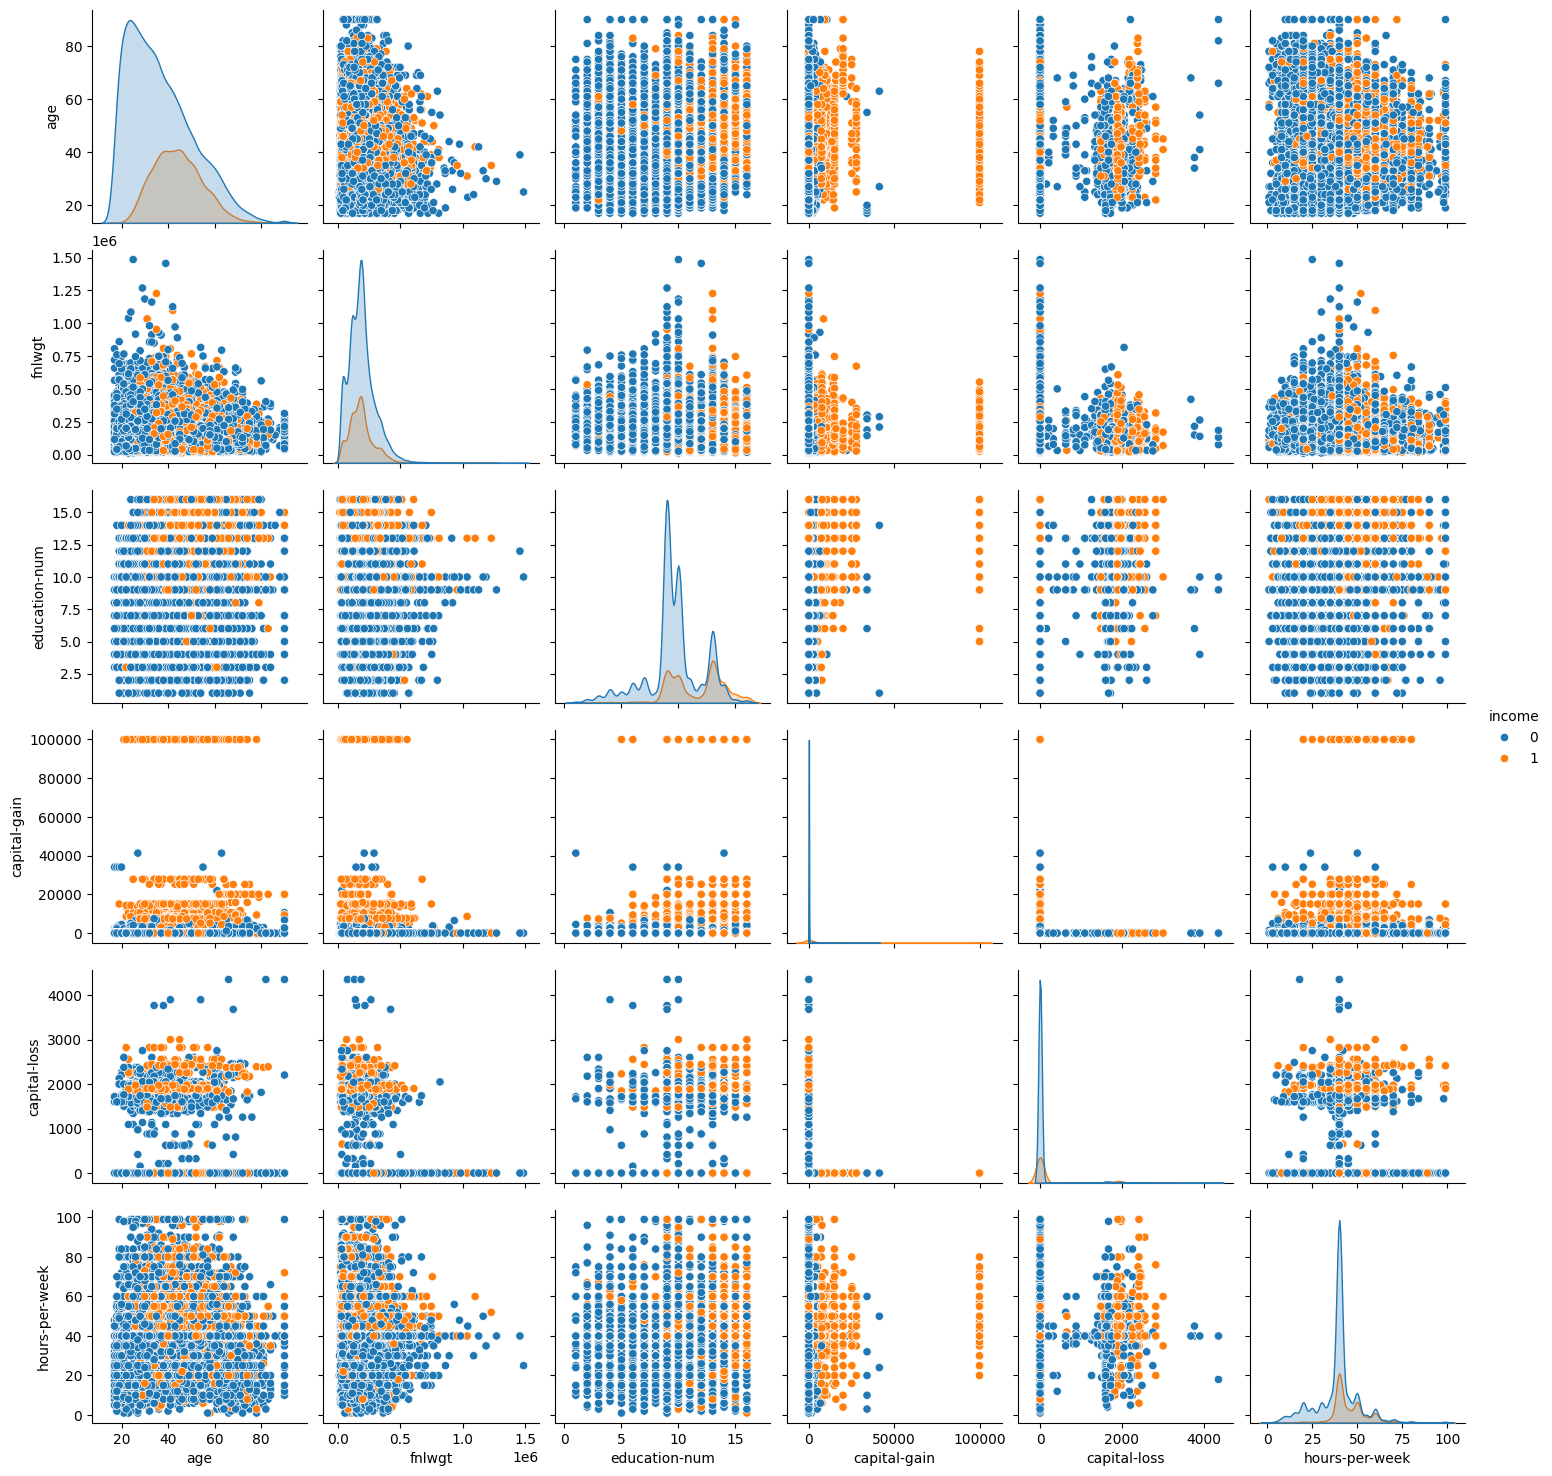

In [ ]:
sns.pairplot(df, hue="income")
plt.plot()

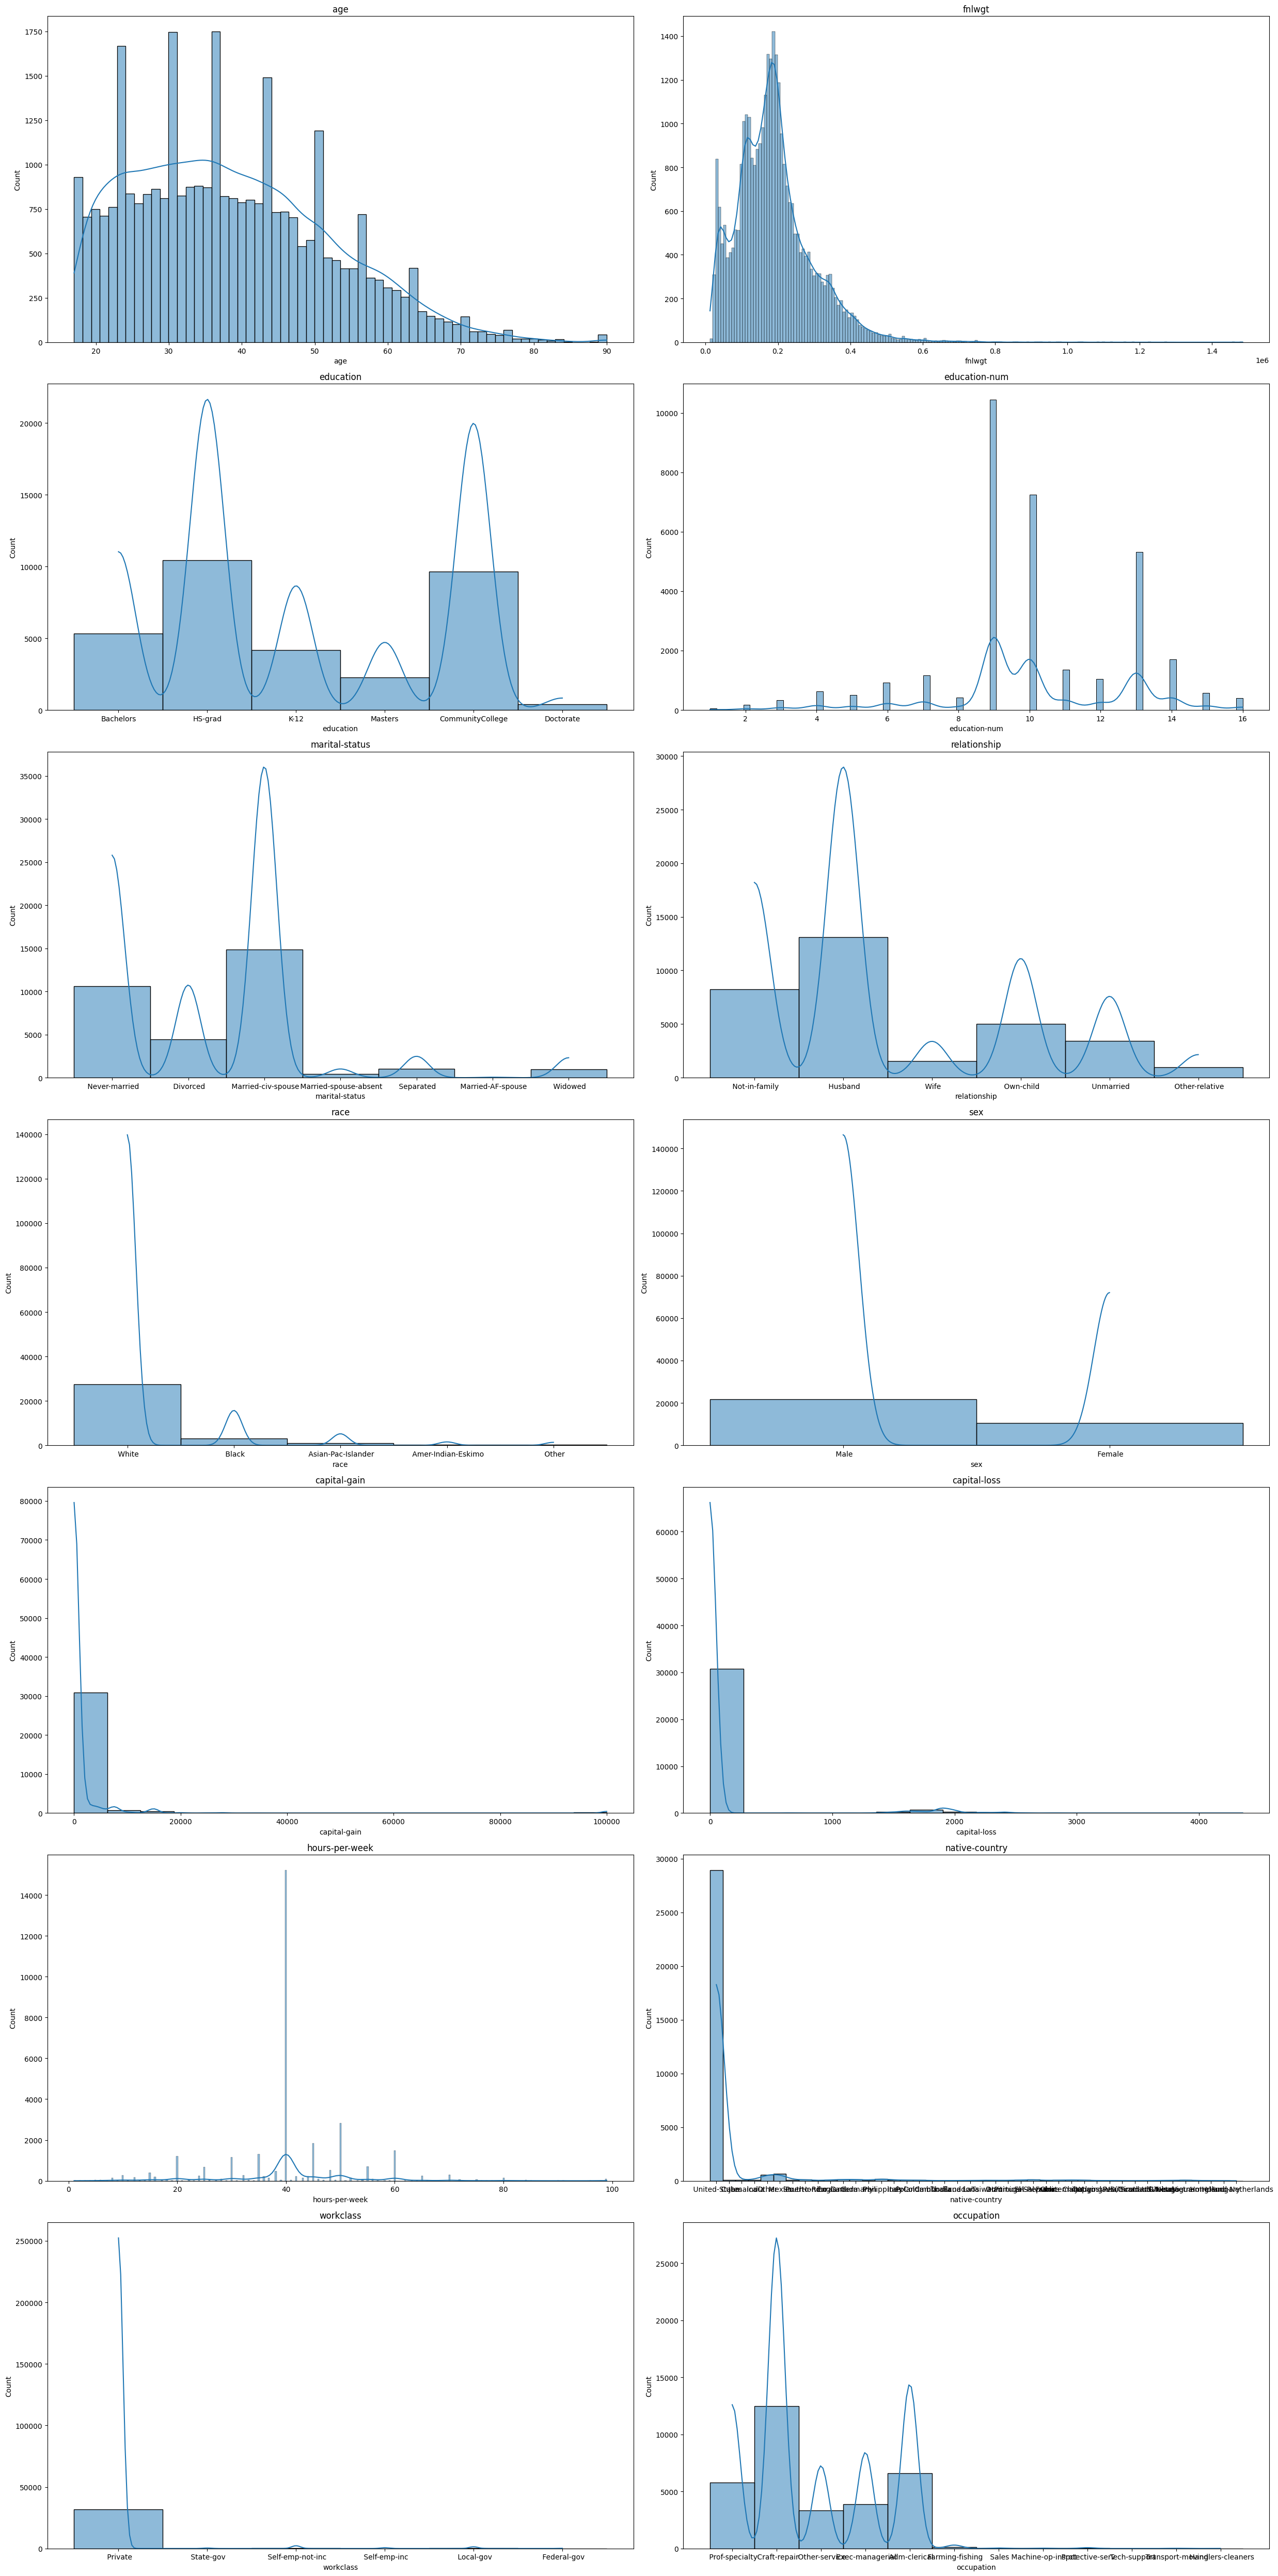

In [ ]:
figure, axes = plt.subplots((len(df.columns)//2), 2, figsize=(25, 50))
axes = axes.flatten()

for i, col in enumerate(df.drop('income', axis=1).columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

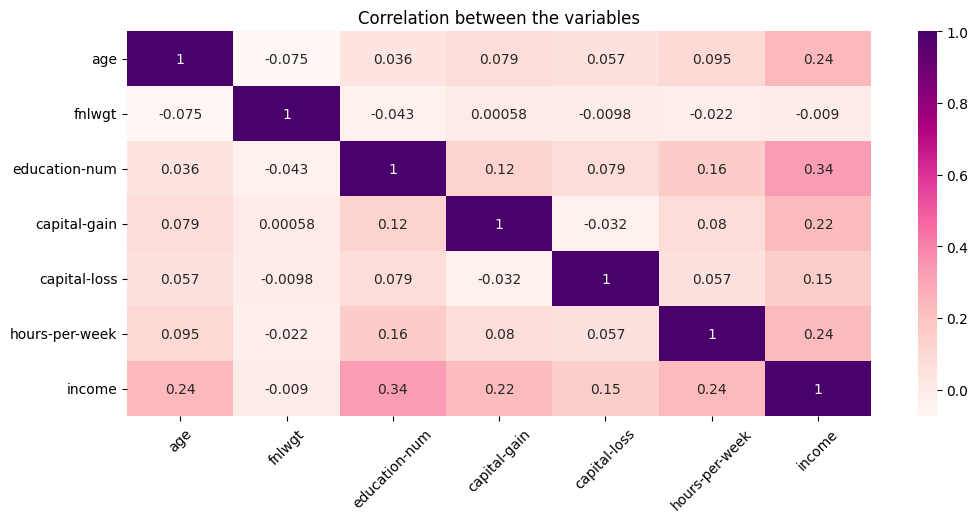

In [ ]:
plt.subplots(figsize=(12,5))
sns.heatmap(df.corr(numeric_only=True ),annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)
plt.show()

### Train-test split

In [11]:
df = df.reindex(columns=['age', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'workclass',
       'occupation', 'income'])

In [12]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

### Preprosessing

In [ ]:
df.head()

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,workclass,occupation,income
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,United-States,Private,Prof-specialty,0
1,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,United-States,Private,Craft-repair,0
2,53,234721,K-12,7,Married-civ-spouse,Husband,Black,Male,0,0,40,United-States,Private,Other-service,0
3,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,Cuba,Private,Prof-specialty,0
4,37,284582,Masters,14,Married-civ-spouse,Wife,White,Female,0,0,40,United-States,Private,Prof-specialty,0


In [14]:
cat_cols = [col for col in df.columns if df[col].dtype=="O"]
cat_cols

['education',
 'marital-status',
 'relationship',
 'race',
 'sex',
 'native-country',
 'workclass',
 'occupation']

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in cat_cols:
    x_train[col] = encoder.fit_transform(x_train[col])
    x_test[col] = encoder.transform(x_test[col])

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test)
print("The accuracy of KNN Model is ", accuracy_score(y_test, y_pred))

The accuracy of KNN Model is  0.902556158017041


#### Hyperparameter tuning

In [38]:
from sklearn.model_selection import cross_val_score
k_range = list(range(3, 21))
k_scores = []
mae_results = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    mae_score = -1 *cross_val_score(knn, x_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    mae_results[k] = mae_score.mean()

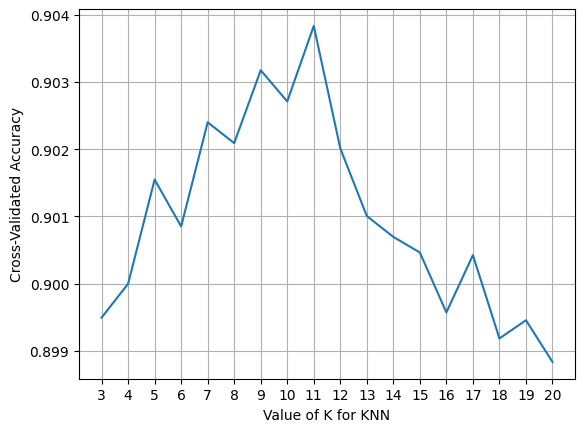

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid()
plt.show()

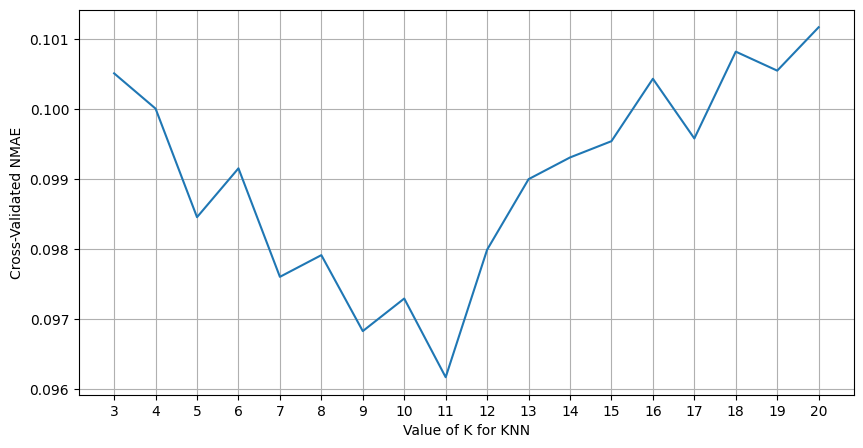

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(list(mae_results.keys()), list(mae_results.values()))
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated NMAE')
plt.xticks(k_range)
plt.grid()
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(3, 20, 1),
              'metric': ['minkowski', 'chebyshev'],
              'weights': ['uniform', 'distance']}

grid = GridSearchCV(estimator=knn,
                    param_grid=param_grid,
                    n_jobs=-1,
                    scoring="neg_mean_absolute_error",
                    cv=10)
grid.fit(x_train, y_train)

grid_predictions = grid.predict(x_test)

In [41]:
print("Best score: ", grid.best_score_)
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best score:  -0.09616975448602386
Best parameters:  {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=11)


In [42]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,-0.100508,0.003456,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei..."
1,-0.102173,0.003065,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei..."
2,-0.100004,0.002543,"{'metric': 'minkowski', 'n_neighbors': 4, 'wei..."
3,-0.100779,0.002396,"{'metric': 'minkowski', 'n_neighbors': 4, 'wei..."
4,-0.098455,0.003473,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei..."
...,...,...,...
63,-0.116426,0.003758,"{'metric': 'chebyshev', 'n_neighbors': 17, 'we..."
64,-0.120725,0.004885,"{'metric': 'chebyshev', 'n_neighbors': 18, 'we..."
65,-0.116736,0.003996,"{'metric': 'chebyshev', 'n_neighbors': 18, 'we..."
66,-0.121151,0.004714,"{'metric': 'chebyshev', 'n_neighbors': 19, 'we..."


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_11 = KNeighborsClassifier(n_neighbors=11, metric='minkowski', weights='uniform')
knn_9 = KNeighborsClassifier(n_neighbors=9, metric='minkowski', weights='uniform')

knn_11.fit(x_train, y_train)
y_pred_11 = knn_11.predict(x_test)

knn_9.fit(x_train, y_train)
y_pred_9 = knn_9.predict(x_test)

print('The accuracy of the KNN Model is',accuracy_score(y_test, y_pred))
print('The accuracy of the KNN Model is',accuracy_score(y_test, y_pred))

The accuracy of the KNN Model is 0.8997676219984508
The accuracy of the KNN Model is 0.8997676219984508


In [46]:
from sklearn.model_selection import cross_val_score

scores_11 = -1 * cross_val_score(knn_11, x_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("KNN model with 11 neighbors:")
print("MAE scores:\n", scores_11)
print("Average of MAE scores is ",scores_11.mean())

scores_9 = -1 * cross_val_score(knn_9, x_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')


print("\nKNN model with 9 neighbors:")
print("MAE scores:\n", scores_9)
print("Average of MAE scores is ",scores_9.mean())

KNN model with 11 neighbors:
MAE scores:
 [0.09701782 0.09837335 0.09624322 0.09643687 0.10304087]
Average of MAE scores is  0.09822242605994239

 KNN model with 9 neighbors:
MAE scores:
 [0.09663052 0.0989543  0.09837335 0.09391944 0.10226612]
Average of MAE scores is  0.09802874771976554


## Conclusion
The model with 9 neighbors has slightly more accuracy than the model with 11 neighbors. However, a model with 11 neighbors has less error than a model with 9 neighbors.